# Poisson Distribution
The Poisson distribution is a discrete probability distribution that models the number of events that occur within a fixed interval of **time**, **space**, or **opportunity**, given that:

- Events occur **independently**
- Events occur at a **constant average rate**
- Two events cannot occur at exactly the same instant (in the idealized model)
- The probability of an event in a subinterval is proportional to the length of the subinterval

### The Key Paramater: $\lambda$
The distribution is goverened by a single parameter:
- $\lambda$: the **average rate** (mean number of events per interval)

This parameter is both the **mean** and the **variance** of the distribution.

### Probability Mass Function (PMF)
If events happen at a rate $\lambda$ per unit time, then the probability of observing $k$ events in time $t$ is:
$$
P(N(t)=k) = \frac{(\lambda t)^k e^{-\lambda t}}{k!}
$$

$N(t)$ is a **random variable** that represents the number of events that have occured from time 0 up to time $t$ in a Poisson process.  So $N(t)$ is a **count** that can take on values $0, 1, 2, ...$.  It tells you *how many arrivals* (or occurrences) have happened by time $t$.

### Intuition
Think of the Poisson distribution as a model for **random**, **independent "arrivals"**:
- Customers entering a store
- Emails arriving in your inbox
- Meteors seen per hour
- Defects in a manufacturing batch
- Website hits per minute

### Real-World Applications
Some classic uses include:
- Modeling rare events (e.g., accidents, system failures)
- Queueing theory (arrival of customers or packets)
- Biology (mutations along DNA strands)
- Physics (radioactive decay counts)
- Historical analysis:
  - Prussian cavalry deaths from horse kicks
  - Bomb strikes in WWII London

## Poisson Process
A Poisson process is a mathematical model for events occurring randomly and independently over time (or space) at a constant average rate, where the number of events in any interval follows a Poisson distribution, and the time between events is exponentially distributed, meaning events happen without a fixed schedule but at a predictable average pace (e.g., customer arrivals, calls to a call center). 
Random & Independent: Events happen randomly and the occurrence of one doesn't affect the next.
- Constant Rate (λ): Events occur at a steady average rate (lambda, λ) over time.
- Memoryless: The waiting time for the next event is independent of how long you've already waited.
- Counts: The number of events in a fixed time follows a Poisson distribution (e.g., probability of 3 calls in an hour).
- Waiting Times: The time between events follows an exponential distribution (e.g., probability of waiting 5 minutes for the next call). 

### Why It Matters
The Poisson distribution is foundational because it:
- Provides a simple model for **count data**
- Has deep connections to the **exponential distribution**
- Approximates the **binomial distribution** when *n* is large and *p* is small
- Appears naturally in many stochastic systems

### Shape and Behavior
- For **small** $\lambda$, the distribution is **skewed right** and heavily concentrated near 0
- As $\lambda$ increases, the distribution becomes more **symmetric** and resembles a normal distribution


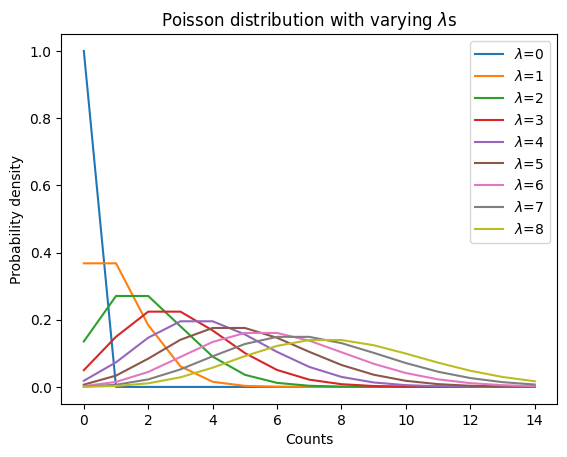

In [11]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

xs = np.arange(15)
fig, ax = plt.subplots()
ax.plot(xs, stats.poisson.pmf(xs, 0), color="C0", label="$\\lambda$=0")
ax.plot(xs, stats.poisson.pmf(xs, 1), color="C1", label="$\\lambda$=1")
ax.plot(xs, stats.poisson.pmf(xs, 2), color="C2", label="$\\lambda$=2")
ax.plot(xs, stats.poisson.pmf(xs, 3), color="C3", label="$\\lambda$=3")
ax.plot(xs, stats.poisson.pmf(xs, 4), color="C4", label="$\\lambda$=4")
ax.plot(xs, stats.poisson.pmf(xs, 5), color="C5", label="$\\lambda$=5")
ax.plot(xs, stats.poisson.pmf(xs, 6), color="C6", label="$\\lambda$=6")
ax.plot(xs, stats.poisson.pmf(xs, 7), color="C7", label="$\\lambda$=7")
ax.plot(xs, stats.poisson.pmf(xs, 8), color="C8", label="$\\lambda$=8")
ax.set_title("Poisson distribution with varying $\\lambda$s")
ax.set_xlabel("Counts")
ax.set_ylabel("Probability density")
plt.legend()
plt.show()

### When does a Poisson approximate a Normal distribution?
A Poisson distribution with rate parameter $\lambda t$ is well‑approximated by a **Normal distribution** when:
$$
\lambda t \text{ is large (typically } \lambda t \gtrsim 10 \text{)}
$$
In a Poisson process, this means that when the expected number of events in the interval is large, the distribution $N(t)$ becomes approximately Normal.  The right skew whe $\lambda t$ is small dissipates and becomes a symmetric bell-like curve.

### When does a Poisson approximate a Binomial?
A Binomial distribution $Bin(n,p)$ is well-approximated by a Poisson distribution with parameter
$$
\lambda = np
$$
when two conditions hold:
1) *n* is large
2) *p* is small

The resemblance does not depend on $\lambda$ alone.
- You can have $\lambda = 4$ from:
  - $n=100$, $p=0.04 \rightarrow$ excellent Poisson approximation
  - $n=8$, $p=0.5 \rightarrow$ terrible Poisson approximation
- Same $\lambda$, totally different behavior

The shape of the Binomial depends on both *n* and *p*, while Poisson depends only on $\lambda$.

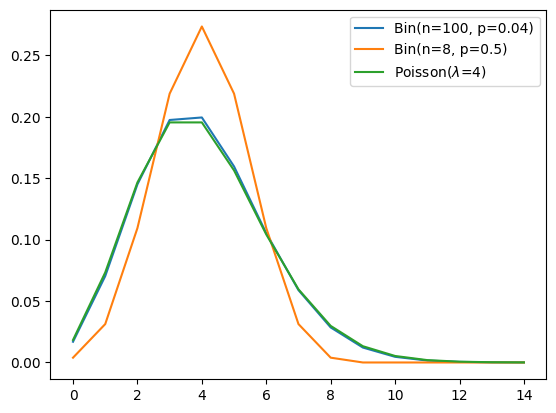

In [21]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

x = np.arange(15)

n1, p1 = 100, 0.04
pmf_binom1 = stats.binom.pmf(x, n1, p1)

n2, p2 = 8, 0.5
pmf_bimom2 = stats.binom.pmf(x, n2, p2)

lam = 4
pmf_poisson = stats.poisson.pmf(x, lam)

fig, ax = plt.subplots()
ax.plot(x, pmf_binom1, color="C0", label=f"Bin(n={n1}, p={p1})")
ax.plot(x, pmf_bimom2, color="C1", label=f"Bin(n={n2}, p={p2})")
ax.plot(x, pmf_poisson, color="C2", label=f"Poisson($\\lambda$={lam})")
plt.legend()
plt.show()

### How the Poisson and Exponential Distributions are Related

The Poisson and Exponential distributions are two sides of the same coin.  They describe **different aspects of the same underlying process**: a **Poisson process**, where events occur randomly, independetly, and at a constant average rate.  If events follow a **Poisson process**, then:
- The number of events in time $t$ is **Poisson**
- The time between events is **Exponential**

This is the core link.  More formally:
- The probability that **no event occurs** in time $t$ is:
$$
P(N(t)=0) = e^{-\lambda t}
$$
- But this is also the probability that the **waiting time exceeds** t:
$$
P(T>t) = e^{-\lambda t}
$$

Different questions, **same formula** $\rightarrow$ same distribution.